N.B. Follow these instructions to improve appearance of Jupyter notebook: 
    https://forums.fast.ai/t/useful-jupyter-notebook-tips-plugins-collapsible-sections/17919

# Exercise: plotting experimental rock mechanics data

Welcome to the rock mechanics exercise! We are going to process some experimental data to create this lovely plot:
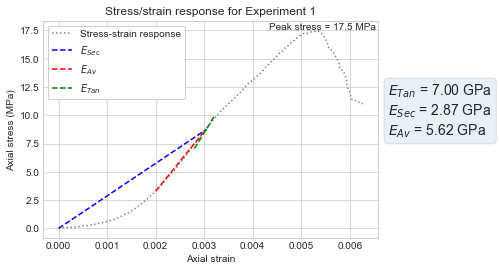
As you generate and adapt the plot throughout this exercise, you can keep referring back to this master plot to see how you're doing.

# Importing data
We will import the data file *'experiment1.csv'*, which is also within this subdirectory, following the same method outlined in Session 2. Have a go in the following code cells, after importing the pandas library.

In [1]:
#import pandas library

Have a quick look at *'experiment1.csv'*. It comprises two columns titled stress and strain.

Import the whole file using read_csv from the pandas library. Remember that importing data is case sensitive. Import to a variable called df (dataframe).

In [2]:
#import data here

To view the variable (and check it's imported correctly), just type the variable name. To refer to only one column, use df.stress, or df.strain.

In [3]:
#write your code here

# Creating a simple stress/strain plot

Now we want to create a simple line plot, so we're going to use Matplotlib: https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html.

The code below sets up the matplotlib environment and imports as plt - this means that commands within this library should be written as plt.subplots (for example). We also import the numpy library as np.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

First, we set up the figure environment.

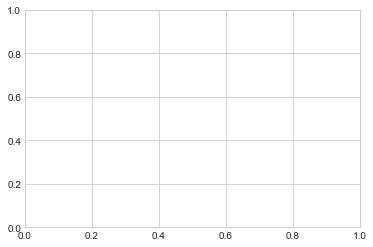

In [5]:
fig, ax = plt.subplots()

Now that the figure environment has been established, create a plot with strain on the x axis and stress on the y axis. You should format this line as a grey dotted line. To view your figure and check how it's progressing, just type fig on a new line.

In [6]:
#plot basic stress-strain curve here

Now, label the x axis with 'Axial Strain', the y axis with 'Axial stress (MPa), and the whole plot as 'Stress/Strain response for Experiment 1'. Again, to view your figure as you go, just type fig on a new line.

In [7]:
#set labels and plot title here

Calculate the maximum stress, saving it to a variable named 'peak'. Print this variable to screen using the syntax print(peak).

In [8]:
#calculate maximum stress

We want to work out the index of this peak stress, so we use df.idxmax:

In [9]:
dfmaxid = df.idxmax()[0] #this returns the index of the maximum stress only (e.g. column 0, not column 1)

NameError: name 'df' is not defined

Now, we are going to add an annotation to the plot, so that the graphical peak stress is labelled with its numerical value. To do this, we use the ax.text command. This works as follows: ax.text(xcoord, ycoord, text).

Work out which coordinates you want to plot the text at, and add the text. Display your plot to check your progress.

In [ ]:
#add text label for peak stress

# Calculating elastic moduli

In rock mechanics, there are multiple ways in which we derive the Young's modulus (elasticity) of a rock sample:
1) Tangential Young's modulus: σ/ε measured at a tangent to the curve at a fixed percentage of the peak stress, normally at 50%

2) Secant Young's modulus: σ/ε measured from zero stress to a fixed percentage of the peak stress, normally 50%

3) Average Young's modulus: average slope of the more-or-less straight line portion of the curve

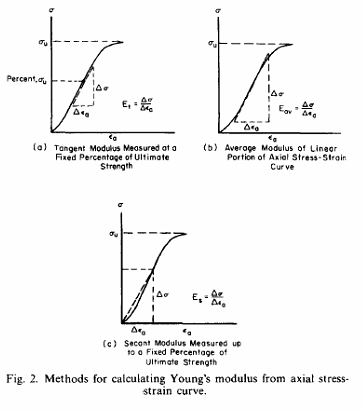

### Tangential Young's modulus

To calculate tangential Young's modulus, we first want to find the strain value at 50% of the peak stress.

It is logical to think we could use np.where(df.stress=peak/2) to get the index of the value equivalent to 50% peak stress, however in this case we can't do that because the value might not be EXACTLY equal to this number, so we need to find the index of the value closest to this number. To do this we subtract the number we're looking for from every element and find the minimum value.

In [ ]:
# establish index of 50% peak stress
idx=(np.abs(df.stress - peak/2)).argmin()
print(idx)

Because the data is closely spaced, we want to take a datapoint either side of this 50% value to use as the tangent. Effectively what we are doing here is: (change in x)/(change in y), where we are taking the change just above and just below 50% peak stress.

Define a new variable called tang_youngs, and calculate the Young's modulus by doing: (stress just above 50% - stress just below 50%)/(strain just above 50% - strain just below 50%). Compare your value to the master plot to ensure you're on the right track.

In [ ]:
#calculate tangential youngs modulus

Write a command that prints to screen: The tangential Young's modulus is xxx MPa.

In [ ]:
#print tang young's to screen

Typically, we express Young's modulus in GPa. Change the print command to do this.

In [ ]:
#print tang young's to screen, in gpa

### Secant Young's Modulus

The Secant young's modulus is just σ/ε measured from zero stress to a fixed percentage of the peak stress, normally 50%. 

First we need to calculate the strain at 50% peak stress, and save it to a variable called strain_at_50.

In [ ]:
#look up strain value at 50% peak stress

Effectively, we are doing this calculation: (change in stress from 0 to 50% peak stress)/(change in strain from 0 to 50% peak stress).

Create a new variable called secant_youngs and calculate the Young's modulus.

In [ ]:
#calculate secant young's modulus

Just like before, print this to screen in a user-friendly format.

In [ ]:
#print secant young's to screen

### Average Young's Modulus

To calculate the average Young's modulus, we need to quantitatively establish where the linear portion of the curve is. To do this, we calculate the gradient between each consecutive point for the linear portion, and then take the average of these gradients. The aim of this section is to do the following:

1. Estimate by eye from the plot the start and end x bounds of the linear portion.

2. Write a for loop which cycles through these points, calculating the gradient for each interval.

3. Calculate the mean gradient for this portion of the curve.

First, we need to define the xbounds of the linear portion of the curve. We are going to assess by eye and use xmin = 0.002, and xmax = 0.003. Define these variables, and then create variables idxmin and idxmax which define the index at which these strain values exist.

In [ ]:
#define the x bounds of the linear portion of the curve, and find the corresponding indices

Now, we need to construct a for loop. 

1. Initialise array called mod, with length equal to the amount of indices between idxmin and idxmax-1. 
2. Initialise new variable j as 0.
3. For i in range between idxmin and idxmax-1, mod[j] = (change in y/change in x). Using the mod[j] notation will write to new lines of the array mod. So at the end of the for loop, we need to do j=j+1.

In [ ]:
#construct for loop here

We now have an array that shows us the gradient for every interval between our defined bounds of the linear portion of the curve. Create new variables av_youngs and av_youngs_std to calculate the average Young's modulus and the associated error (1 x standard deviation). Print these values to screen and compare with the master plot.

In [ ]:
#calculate average youngs modulus

In [ ]:
#calculate standard deviation of average youngs modulus

# Displaying calculated Young's moduli on the plot

First, we want to add a textbox to our plot that tells us the values for each of the Young's modulus calculations. 



Define text strings to place next to the plot. There is already code for the first line, and to add a line break. Complete the code so that there are also text strings added for the Secant Young's modulus and the average Young's modulus.

In [ ]:
# complete the existing code to define text string
textstr= r'$E_{Tan}$ = %.2f GPa' %(tang_youngs/1000)
textstr+= "\n"


Now we are going to add annotation next to the plot. Annotate is most commonly used to text at a position relative to a point (xy) and optionally connect the text and the point with an arrow, which we'll skip here.

This is a bit complex, so let's break it down:

ax.annotate('...Additional information...',  # Your text string

            # The point that we'll place the text in relation to 
            xy=(0.5, 0), 
            # Interpret the x as axes coords, and the y as figure coords
            xycoords=('axes fraction', 'figure fraction'), # n.b. in this case, the top right hand side of the plot is (1, 1)
            # Any other text parameters we'd like
            size=14)
            
We can also add a textbox behind the text by adding bbox = dict(boxstyle='round') within this command, after the size definition. If you want this to be a transparent box, you can add alpha=0.1, after the boxstyle definition and still within your dict brackets.

Show the plot to see how it looks now.



In [ ]:
#add annotation command here


# adjust plot view so that plot takes up 70% of figure window and there is space to the right
plt.subplots_adjust(right=0.7)

Your plot should be looking something like this by this point: 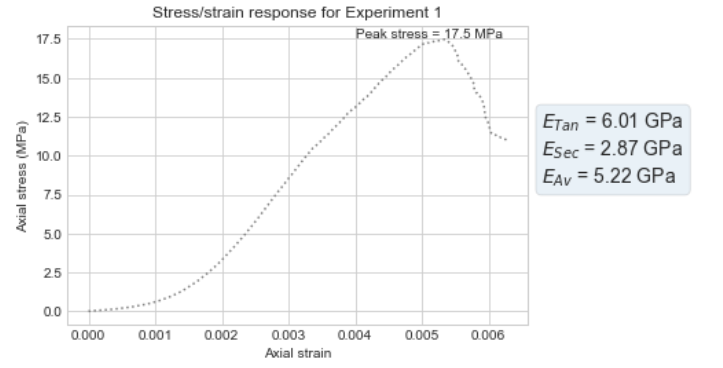

The final step is to graphically add the Young's modulus calculations on the plot.

First up, plot the secant Young's modulus using a dashed blue line. Add a label to the line that will be used for a legend later. The secant Young's modulus should display as a line from (0,0) to (strain at 50%, stress at 50%) - the plot format in Python is ([x0,x1],[y0,y1]). Display the plot and compare to the master plot to see if you've done this correctly.

We want to also add a label to each line, so that the legend will plot correctly later. To do this for the first line (secant Young's), we add the following within the plot command: label=r'texthere'

In [ ]:
#plot the secant Young's modulus line

Next up, we add the average Young's modulus to the plot. Plot this as a dashed red line. It should plot the whole length of the section we estimated to be linear (e.g. from 0.002 to 0.003 strain).

In [ ]:
#plot the average Young's modulus line

Finally we graphically add the tangential Young's modulus to the plot. Plot this as a dashed green line.

In [ ]:
#plot the tangential Young's modulus line

By now, your plot should look like this:
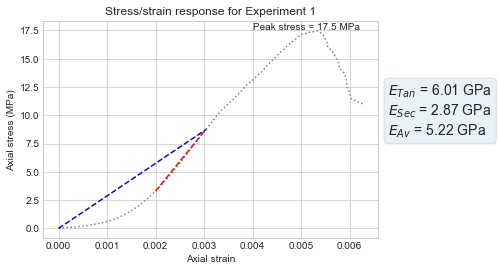

However: the tangential Young's modulus line is very small and hard to see, so we can play around with the plotting. To do this, we calculate the equation of the line. Let's first take a point on the line - the x and y coordinates are...

In [ ]:
[df.strain[idx-1], df.stress[idx-1]]

We also know the gradient of the line is:

In [ ]:
tang_youngs

The equation of a line is y=mx+c. The c intercept can therefore be calculated by:

c = y-mx

In [ ]:
# calculate the c intercept here

So if we want to plot a line, for example from 0.0028 to 0.0032, we just substitute these values for x in the equation:

In [ ]:
y1 = (tang_youngs*0.0028)+c    # this is the first y value, now calculate the second:


We might want to automate this if the script was going to be used for multiple datasets. Plot the tangential line more clearly by using these new coordinates.

In [ ]:
# plot the new tangential Young's modulus line here

No plot is complete without a legend! Add a legend using the ax.legend command. We can play around with variables here too, including facecolor, and framealpha.

The example plot uses the following, but have a play and see what looks nice: frameon=True,facecolor='white', framealpha=1

In [ ]:
# add legend here

Congrats, you now have a beautiful Python plot summarising this data! Well done :)